Name: **Luong Nguyen**  
Student ID: **1504210**  

## Introduction to Deep Learning 

### Session04: handwritten digits and data augmentation (evaluating models)
____

In [22]:
# import packages
import numpy as np
import keras
import keras.preprocessing.image as image
from keras.models import load_model
import matplotlib.pyplot as plt
import os

### Load models

In [23]:
model1 = load_model('model1.h5') # without data augmentation
model2 = load_model('model2.h5') # with data augmentation

### Load my test digits

In [24]:
x_mytest = []
y_mytest = []

# https://stackoverflow.com/questions/25868109/python-read-all-files-in-directory-and-subdirectories
for root, directories, filenames in os.walk('digits'): 
    for filename in filenames: 
        file = os.path.join(root,filename)
        x_mytest.append(255 - np.array(image.load_img((file), target_size=(28, 28), grayscale=True)))
        y_mytest.append(int(file[7]))
        
x_mytest = np.array(x_mytest)
y_mytest = np.array(y_mytest)
print("x_mytest shape: %s" % (str(x_mytest.shape)))
print("y_mytest shape: %s" % (str(y_mytest.shape)))

x_mytest shape: (50, 28, 28)
y_mytest shape: (50,)


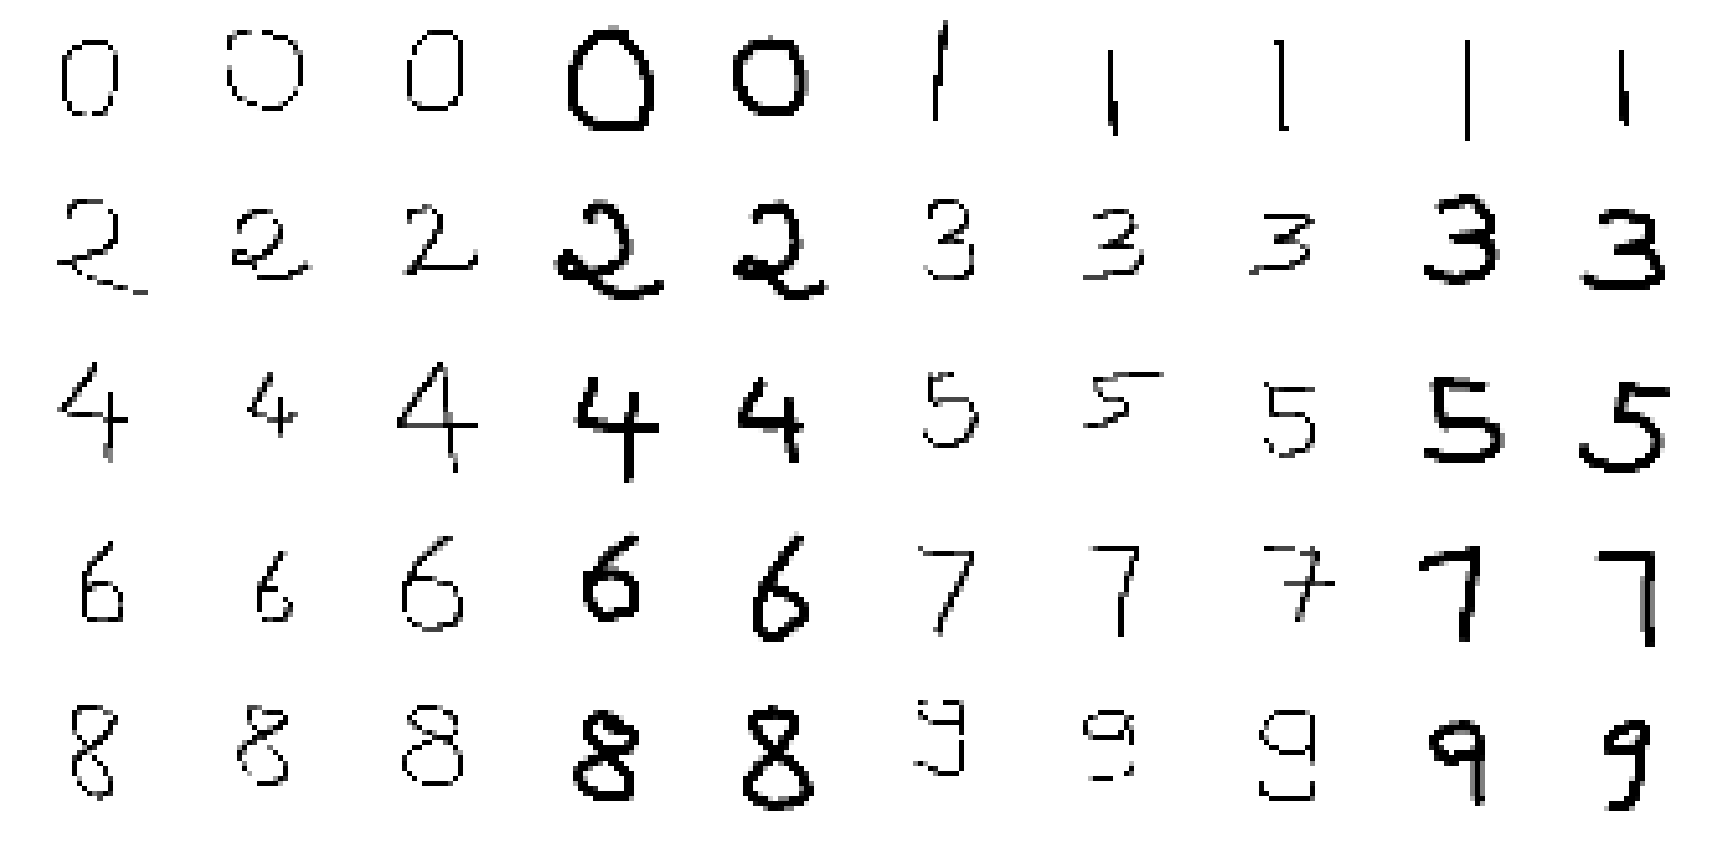

In [25]:
# plot numbers in my test set
rows = 5
f = plt.figure(figsize=(30,15))
for i in range(len(images_indices)):
    sp = f.add_subplot(rows, 50//rows, i+1)
    sp.axis('Off')
    plt.imshow(x_mytest[i], cmap=plt.cm.binary)  

### Prepare data

In [26]:
x_mytest = x_mytest.astype('float32') / 255

# categorically encode the labels
from keras.utils import to_categorical

y_mytest  = to_categorical(y_mytest )

# x should have rank 4, the channels axis should have value 1
x_mytest  = x_mytest .reshape(x_mytest .shape + (1,))

# Data shape after preprocessing
print("x_mytest shape: %s" % (str(x_mytest.shape)))
print("y_mytest shape: %s" % (str(y_mytest.shape)))

x_mytest shape: (50, 28, 28, 1)
y_mytest shape: (50, 10)


### Evaluate models

In [27]:
model1.evaluate(x_mytest, y_mytest)

50/50 [==============================] - 0s 3ms/step


[3.069467487335205, 0.7800000071525574]

In [28]:
model2.evaluate(x_mytest, y_mytest)

50/50 [==============================] - 0s 3ms/step


[0.5528321534395217, 0.8600000023841858]

Model1 (train without data augmentation) performs better on the mnist validation set (99%) compared to 97% of model2 (train with data augmentation). However, on my digits test set, model2 outperforms model1 (86% vs 78%). With the dense network in session 2, we only get 50% accuracy, so using convnet model and data augmentation did improve the accuracy on my real handwritten images.